<a href="https://colab.research.google.com/github/siri2002/Language_Detection/blob/main/ML_Final_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Language Detection Model**

**Multionomial Naive Bayes**

In [ ]:
import re
import string
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [ ]:
data = pd.read_csv('dataset.csv.zip')
print(data)

                                                    Text  language
0      klement gottwaldi surnukeha palsameeriti ning ...  Estonian
1      sebes joseph pereira thomas  på eng the jesuit...   Swedish
2      ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...      Thai
3      விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...     Tamil
4      de spons behoort tot het geslacht haliclona en...     Dutch
...                                                  ...       ...
21995  hors du terrain les années  et  sont des année...    French
21996  ใน พศ  หลักจากที่เสด็จประพาสแหลมมลายู ชวา อินเ...      Thai
21997  con motivo de la celebración del septuagésimoq...   Spanish
21998  年月，當時還只有歲的她在美國出道，以mai-k名義推出首張英文《baby i like》，由...   Chinese
21999   aprilie sonda spațială messenger a nasa și-a ...  Romanian

[22000 rows x 2 columns]


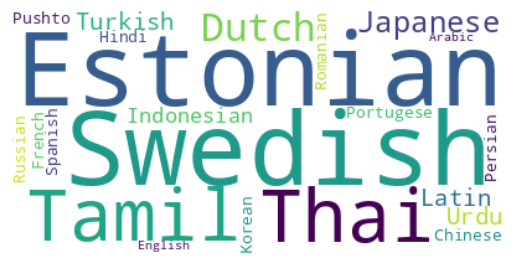

In [ ]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
#Importing Dataset
df = pd.read_csv("dataset.csv.zip")
#Checking the Data
df.head()
#Checking for NaN values
df.isna().sum()
#Removing NaN Values
df.dropna(inplace = True)
#Creating the text variable
text = " ".join(cat.split()[0] for cat in df.language)
# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# Prepare data for model training
X = data["Text"]
y = data["language"]

In [ ]:
# Preprocess data
def preprocess(text):
    text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)  # removing the symbols and numbers
    text = re.sub(r'[[]]', ' ', text)
    text = text.lower()  # converting the text to lower case
    return text

# creating a list for appending the preprocessed text
data_list = []

for text in X:  # iterating through all the text
        preprocess(text)
        data_list.append(text)# appending to data_list

X = data_list

<ipython-input-5-766dec203cb3>:4: FutureWarning: Possible nested set at position 1
  text = re.sub(r'[[]]', ' ', text)


In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
# Extract features from text data
vectorizer = CountVectorizer(ngram_range=(1, 3), analyzer='char')
X_train_feats = vectorizer.fit_transform(X_train)
X_test_feats = vectorizer.transform(X_test)

In [ ]:
# Train model
model = MultinomialNB()
model.fit(X_train_feats, y_train)

MultinomialNB()

In [ ]:
y_pred = model.predict(X_test_feats)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
cr = classification_report(y_test, y_pred)
print("classification Report : \n")
print(cr)

[[341   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0 312   0   5   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0 339   3   0   3   0   0   0   0   0   0   0   0   0   0   1   0
    0   0   0   0]
 [  0   0   0 331   0   0   0   1   0   0   1   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   1  11 321   1   0   0   0   0   1   0   1   0   0   2   0   0
    0   0   0   0]
 [  0   0   0   3   0 320   0   0   0   0   0   0   0   0   0   0   1   0
    0   0   0   0]
 [  0   0   0   7   0   0 334   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   0  16   0   0   0 302   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   1   1   0   1   0   0 324   0   0   0   0   0   0   1   0   0
    0   0   0   0]
 [  0   3   0   1   0   0   0   0   0 321   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   2  25   1   5   0   0   0   0 310   0   1   0   0   0   2 

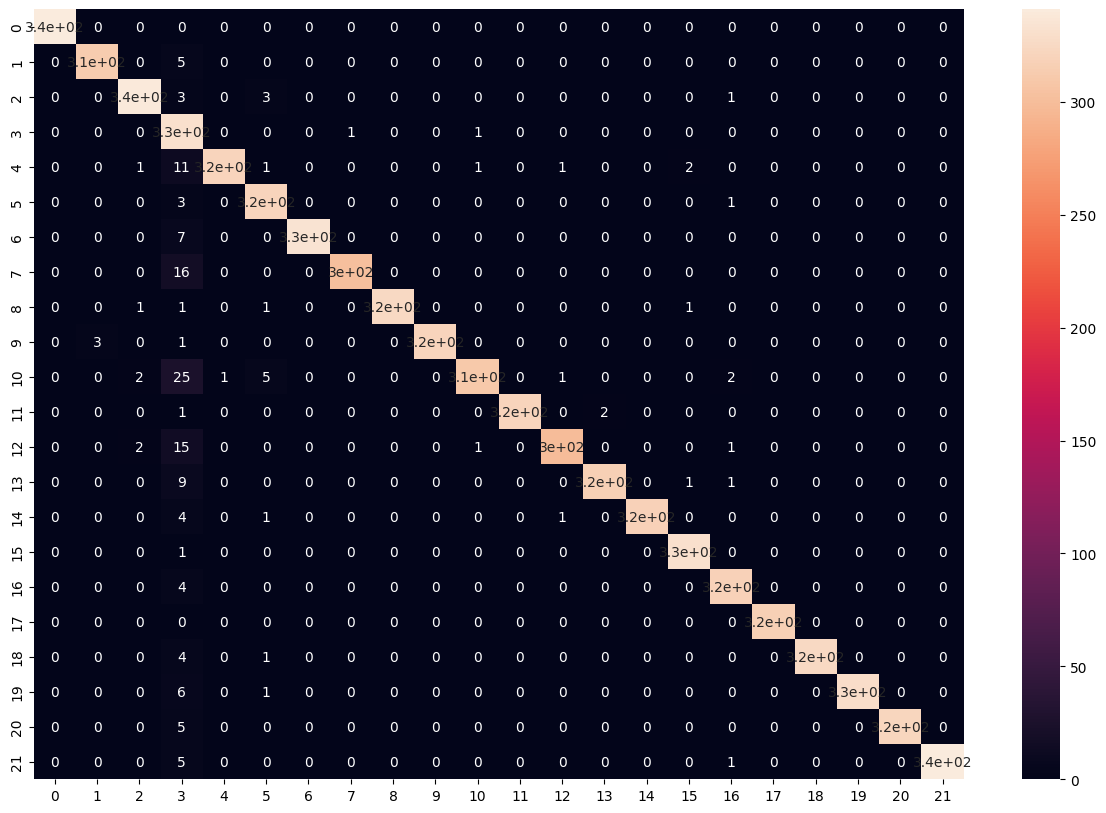

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (15,10))
sns.heatmap(cm, annot = True)
plt.show()

In [ ]:
train_acc = model.score(X_train_feats, y_train)
print("Accuracy:", train_acc)

Accuracy: 0.9793758480325645


In [ ]:
# Evaluate model
test_acc = model.score(X_test_feats, y_test)
print("Accuracy:", test_acc)

Accuracy: 0.9767217630853995


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
a1 = accuracy_score(y_test,y_pred)
a1 = round(a1*100,2)
print(a1)
p1 = precision_score(y_test,y_pred,average = "macro")
p1 = round(p1*100,2)
print(p1)
r1 = recall_score(y_test,y_pred,average = "macro")
r1 = round(r1*100,2)
print(r1)
print("Accuracy :" ,a1)
print("Precision :",p1)
print("Recall :",r1)

97.67
98.15
97.69
Accuracy : 97.67
Precision : 98.15
Recall : 97.69


In [ ]:
# Test model on new data
new_text = str(input("Enter any text : "))
new_text_feat = vectorizer.transform([preprocess(new_text)])
lang = model.predict(new_text_feat)[0]
print("Language:", lang)

Enter any text : abcg
Language: Indonesian


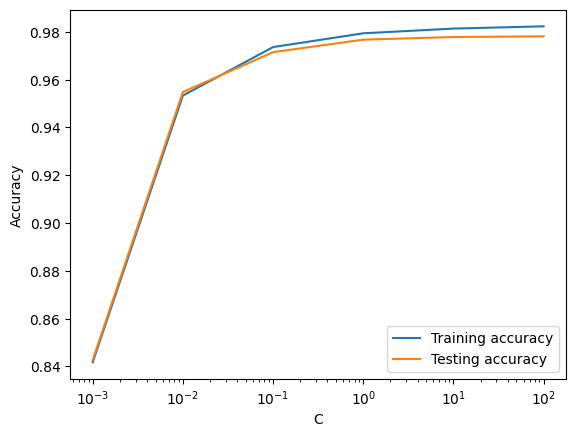

In [ ]:
import matplotlib.pyplot as plt

C_values = [0.001, 0.01, 0.1, 1, 10, 100]
train_accuracy = []
test_accuracy = []
for C in C_values:
    model = MultinomialNB()
    model.fit(X_train_feats, y_train, C)
    train_accuracy.append(model.score(X_train_feats, y_train))
    test_accuracy.append(model.score(X_test_feats, y_test))

# plot the accuracy curve
plt.plot(C_values, train_accuracy, label='Training accuracy')
plt.plot(C_values, test_accuracy, label='Testing accuracy')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.legend()
plt.show()

**Support Vector Machine**


In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [ ]:
data = pd.read_csv("dataset.csv.zip")
x = np.array(data["Text"])
y = np.array(data["language"])

In [ ]:
# vectorize text data using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(x)

In [ ]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)

In [ ]:
# train an SVM classifier on the training set
clf = SVC(kernel='linear', C=1, probability=True)
clf.fit(X_train, y_train)

SVC(C=1, kernel='linear', probability=True)

In [ ]:
# evaluate the classifier on the testing set
train_acc = clf.score(X_train, y_train)
print("Training accuracy : ", train_acc)
test_acc = clf.score(X_test, y_test)
print("Testing accuracy:", test_acc)

Training accuracy :  0.9999393939393939
Testing accuracy: 0.9367272727272727


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
a2 = accuracy_score(y_test,y_pred)
a2 = round(a2*100,2)
p2 = precision_score(y_test,y_pred,average = "macro")
p2 = round(p2*100,2)
r2 = recall_score(y_test,y_pred,average = "macro")
r2 = round(r2*100,2)
print("Accuracy :" ,a2)
print("Precision :",p2)
print("Recall :",r2)

'from sklearn.metrics import accuracy_score, precision_score, recall_score\na2 = accuracy_score(y_test,y_pred)\na2 = round(a2*100,2)\np2 = precision_score(y_test,y_pred,average = "macro")\np2 = round(p2*100,2)\nr2 = recall_score(y_test,y_pred,average = "macro")\nr2 = round(r2*100,2)\nprint("Accuracy :" ,a2)\nprint("Precision :",p2)\nprint("Recall :",r2)'

In [ ]:
# use the trained classifier to predict the language of new text samples
new_texts = [str(input("Enter any text : "))]
X_new = vectorizer.transform(new_texts)
predicted_labels = clf.predict(X_new)
print("Language :", predicted_labels)

Enter any text : adcd
Language : ['Japanese']


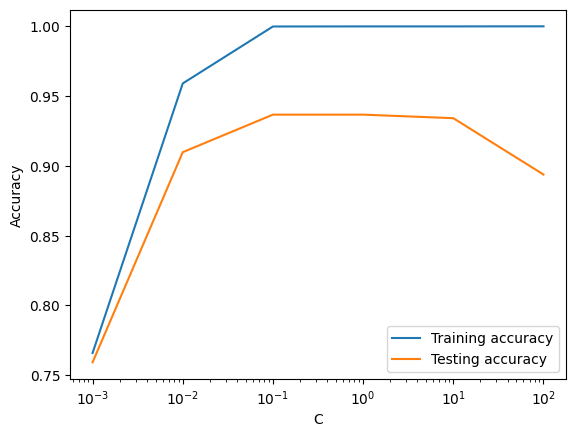

In [ ]:
import matplotlib.pyplot as plt

C_values = [0.001, 0.01, 0.1, 1, 10, 100]
train_accuracy = []
test_accuracy = []
for C in C_values:
    clf = SVC(kernel='linear', C=C)
    clf.fit(X_train, y_train)
    train_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

# plot the accuracy curve
plt.plot(C_values, train_accuracy, label='Training accuracy')
plt.plot(C_values, test_accuracy, label='Testing accuracy')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.legend()
plt.show()

**Comparision table**

In [1]:
import matplotlib.pyplot as plt
algorithm = ['Naive Bayes','SVM']
accuracy = [a1,a2]
precision = [p1,p2]
recall = [r1,r2]


fig,ax=plt.subplots()
ax.set_title("LANGUAGE DETECTION")
ax.bar([0,1],accuracy,color="blue",width=0.2,label="Accuracy")
ax.bar([0.2,1.2],precision,color="yellow",width=0.2,label="Precision")
ax.bar([0.4,1.4],recall,color="green",width=0.2,label="Recall")
algorithm_axis = np.arange(len(algorithm))
plt.xticks(algorithm_axis,algorithm)
plt.xlabel("Algorithms")
plt.ylabel("Performance/Accuracy")

ax.legend()
plt.show()

'import matplotlib.pyplot as plt\nalgorithm = [\'Naive Bayes\',\'SVM\']\naccuracy = [a1,a2]\nprecision = [p1,p2]\nrecall = [r1,r2]\n\n\nfig,ax=plt.subplots()\nax.set_title("LANGUAGE DETECTION")\nax.bar([0,1],accuracy,color="blue",width=0.2,label="Accuracy")\nax.bar([0.2,1.2],precision,color="yellow",width=0.2,label="Precision")\nax.bar([0.4,1.4],recall,color="green",width=0.2,label="Recall")\nalgorithm_axis = np.arange(len(algorithm))\nplt.xticks(algorithm_axis,algorithm)\nplt.xlabel("Algorithms")\nplt.ylabel("Performance/Accuracy")\n\nax.legend()\nplt.show()'

**Deployment using Gradio**

In [ ]:
!pip install gradio

In [ ]:
import gradio as gr
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB


data = pd.read_csv('/content/drive/MyDrive/Team_6/dataset.csv.zip')
# Prepare data for model training
X = data["Text"]
y = data["language"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
vectorizer = CountVectorizer(ngram_range=(1, 3), analyzer='char')
X_train_feats = vectorizer.fit_transform(X_train)
X_test_feats = vectorizer.transform(X_test)

mb = MultinomialNB()
mb.fit(X_train_feats, y_train)

new_text = gr.inputs.Textbox(label = 'Text')
new_lang = gr.outputs.Textbox(label = 'Language')


def detect_language(new_text):
  new_text_feat = vectorizer.transform([new_text])
  lang = mb.predict(new_text_feat)[0]
  return lang

gri = gr.Interface(fn = detect_language,inputs = new_text, outputs = new_lang,description = "LANGUAGE DETECTION" )